kaggle Stock Market Data Summary Analyze::


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [99]:
df = pd.read_csv(r"/content/IEX_API.csv")
df.head()

,date,open,high,low,close,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2013-01-22,72.0799,72.5542,70.9471,72.1099,114978192,16425456,0.681428,0.954,71.6831,"Jan 22, 13",0.000000
1,2013-01-23,72.6871,73.5699,72.1099,73.4292,208417125,29773875,1.319300,1.830,71.8632,"Jan 23, 13",0.018296
2,2013-01-24,65.7142,66.5328,64.3214,64.3571,364815136,52116448,-9.072100,-12.355,65.3822,"Jan 24, 13",-0.107514
3,2013-01-25,64.5271,65.1756,62.1428,62.8399,301770994,43110142,-1.517100,-2.357,63.5746,"Jan 25, 13",-0.128554
4,2013-01-28,62.5464,64.7442,62.2657,64.2614,195942705,27991815,1.421400,2.262,64.0217,"Jan 28, 13",-0.108841


In [100]:
### Converting the Volume Dataframe into the Volume list
volume = df['volume'].tolist()
volume.sort()
n = len(volume)
print(n)

1259


Converting the Volume Data ::: Sum, mean, variance, range, quartiles

In [101]:
max_volume = df['volume'].max()
min_volume = df['volume'].min()
print(max_volume, min_volume)

364815136 11475922


In [102]:
# mean = sum(df['volume'])/len(df['volume'])
# mean
mean_volume = df['volume'].sum()/len(df['volume'])
print(mean_volume)

55307606.119142175


In [103]:
### Calculating the Variance
sum = 0
for i in volume:
  sum += (i - mean_volume)**2
variance = sum/len(df['volume'])
print(variance)

1320333144877994.8


In [104]:
### Calculating the Standard Deviation of of the Given Dataset
standard_deviation = variance ** 0.5
print(f"The Standard Deviation of the given Stock Market Data is {standard_deviation}")
print(f"The Variance of the Standard Deviation of the given Stock Market Data is {variance}")

The Standard Deviation of the given Stock Market Data is 36336388.715418525
The Variance of the Standard Deviation of the given Stock Market Data is 1320333144877994.8


In [105]:
### Calculating the 1st, 2nd and 3rd Standard Deviation
std1 = mean_volume + standard_deviation
std2 = mean_volume + 2*standard_deviation
std3 = mean_volume + 3*standard_deviation
print(std1)
print(std2)
print(std3)

91643994.83456069
127980383.54997922
164316772.26539776


In [106]:
### Calculating the Q1,Q2,Q3 From the given Stock Market Dataset
### Calculating the Postion for the Volume of the given Dataset
### For the 1st Position, 2nd Position, and the 3 Position
position1 = (n+1)/4
position2 = (n+1)/2
position3 = 3*(n+1)/4
## Displaying the Result of the Positon ;
print(position1)
print(position2)
print(position3)

315.0
630.0
945.0


In [107]:
### Calculating the First, Second and Third Quartiles ::
q1 = volume[int(position1)]
q2 = volume[int(position2)]
q3 = volume[int(position3)]
print(q1)
print(q2)
print(q3)
iqr = q3-q1
print(iqr)

29736835
45809490
69650490
39913655


In [108]:
### Calcualting the Upper Outliers and Lower Outliers ::
max_outliers = q1-1.5*iqr
min_outliers = q3+1.5*iqr
print(max_outliers)
print(min_outliers)

-30133647.5
129520972.5


Conclusion: From the above analysis, it is clear that the outliers are values less than −10,176,820 and greater than 129,520,972.5.

Making the Normal Distribution :: Using the matplobtlib and seaborn

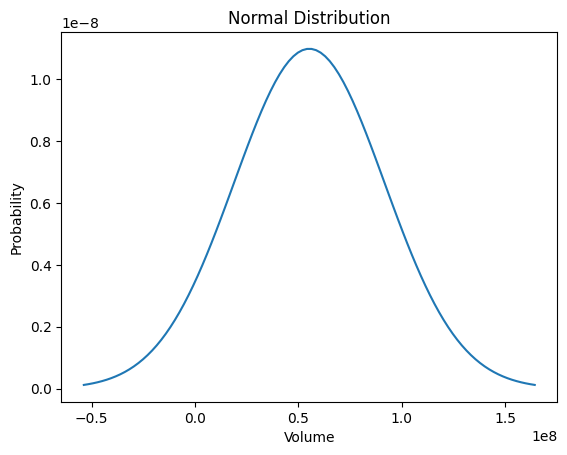

In [109]:
### Making the distributio
mean = df['volume'].mean()
std = df['volume'].std()
x = np.linspace(mean - 3*std, mean + 3*std, 100)
from scipy.stats import norm
x = np.linspace(mean-3*std,mean+3*std,100)
plt.plot(x,norm.pdf(x,mean,std))
### Making the distributio
mean = df['volume'].mean()
std = df['volume'].std()
x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.title('Normal Distribution')
plt.xlabel('Volume')
plt.ylabel('Probability')
plt.show()


Conclusion:
The graph shows that the volume data follows an approximately normal (bell-shaped) distribution centered around the mean. Most values are concentrated near the middle, while very high and very low volumes occur less frequently, indicating possible extreme values at the tails.